## Baseline checks

Just checking everything works as it should

In [ ]:
import torch
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import json



cns = [0, 1]
df = pd.DataFrame()

def get_df(field = "nodesolve"):
    for cn in cns:
        results_path = f"../bin/federated_outputs/results_{cn}.json"
        # path to the results file
        with open(results_path, "r") as f:
            data = json.load(f)
        for entry in data["client_train"]:
                round_num = entry["round"]
                for itr, loss_val in enumerate(entry[field]):
                    df = pd.concat([df, pd.DataFrame([{
                        "client": cn,
                        "round": round_num,
                        "itr": itr,
                        field: loss_val
                    }])], ignore_index=True)
    
    df["itr"] = df["itr"] + 1
    max_itr = df["itr"].max()
    df["itr"] = df["itr"] + (max_itr* df["round"])
    # keep only itr 1:3
    return df

    

# keep only itr 1:3
df = get_df("nodesolve")

In [97]:
df

,client,round,itr,nodesolve
0,0,0,0,26
1,0,0,1,58
2,0,0,2,90
3,0,0,3,122
4,0,0,4,184
...,...,...,...,...
135,1,4,9,1838
136,1,4,10,1906
137,1,4,11,1980
138,1,4,12,2048


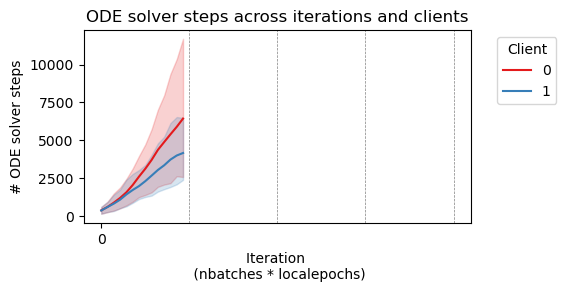

In [98]:
# Plot Loss for making sure, y loss, x round, color client
plt.figure(figsize=(5, 2.5))
sns.lineplot(data=df, x="itr", y="nodesolve", hue="client", palette="Set1")

plt.legend(title="Client")
plt.legend(title="Client", bbox_to_anchor=(1.05, 1), loc='upper left')
# x integer not float ticks
plt.title("ODE solver steps across iterations and clients")
# plot rounds as vertical lines
for i in range(1, df["round"].max()+1):
    plt.axvline(x=i*max_itr, color='gray', linestyle='--', linewidth=0.5)
    # add ticks
    plt.xticks(np.arange(0, df["itr"].max()+1, step=max_itr))


# y label 
plt.ylabel("# ODE solver steps")
# x label
plt.xlabel("Iteration \n (nbatches * localepochs)")
plt.show()

In [ ]:
# print the loss 